# Investigations into the Exponential Mechanism

Let's set $\epsilon=0.01$, assume that our utility function is additive so for a subset of clients, $\mathcal{C}$
$$ U(\mathcal{C}) = \sum_{c \in \mathcal{C}} u(c) $$
where each $||u(\cdot)|| \leq 1$ i.e. this sensitivity has query one. 

To make the analysis simple, let us assume that 5 client subsets have utility > 0.7 and N client subsets have utility below this.

The exponential mechanism draws an option with probability:

$$\exp(\frac{\epsilon\ u}{2 \Delta u})$$

In [102]:
import numpy as np
import itertools as it

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

def sample_test(N, L, epsilon, method="sum", N_consider = 100, N_turns=100):
    def inner_func(N, L, epsilon, method, N_consider, N_turns):
        if L<2:
            L=2

        N_c = int(np.ceil(N/3))
        N_1 = np.random.multivariate_normal(np.array([1, 0]), np.array([[0.1, 0], [0, 0.1]]), size=N_c)
        N_2 = np.random.multivariate_normal(np.array([0, 1]), np.array([[0.1, 0], [0, 0.1]]), size=N_c)
        N_3 = np.random.multivariate_normal(np.array([-0.71, -0.71]), np.array([[0.1, 0], [0, 0.1]]), size=N_c)
        N_all = np.vstack([N_1, N_2, N_3])

        N_total = N_all.shape[0]
        # generate minibatch
        c = np.random.choice(N_total, L, replace=False)
        update = np.sum(N_all[c, :], axis=0) + np.random.normal(0, 1, 1)

        update_scaled = update/np.linalg.norm(update)
        N_scaled = (N_all.T /  np.linalg.norm(N_all, axis=1)).T
        per_point_utility = ((N_scaled @ update_scaled)+1)/2
        combinations = np.random.choice(N_total, L*N_consider, replace=True)
        combinations = [combinations[i:i+L] for i in range(0, len(combinations), L)]
        utility = np.empty(len(combinations))
        for indx, comb in enumerate(combinations):
            utilities = per_point_utility[np.array(comb)]
            if method=="sum":
                utility[indx] = np.sum(utilities)
            elif method=="prod":
                utility[indx] = np.product(utilities) 
        p_u = np.exp(utility * epsilon / 2)
        p = p_u / np.sum(p_u)
        
        if np.sum(np.isnan(p))>0:
            print("nan elements - skip")
            return 0
        c = np.random.choice(np.arange(len(combinations)), size=N_turns, p=p)
        threshold = np.percentile(utility, 75)
        score = np.mean(utility[c] > threshold)
        score = np.mean(utility[c])
        if method =="sum":
            score = score / L
        return score
    
    scores = np.empty(N_turns)
    for i in range(N_turns):
        scores[i] = inner_func(N, L, epsilon, method, N_consider, N_turns)
                               
    return np.mean(scores)


q_s = [0.1, 0.25, 0.5]
N = np.ceil(np.linspace(50, 1000, 20))
print(f"Considering N in {N}")
epsilon = 0.1

# N = [100]
# q_s = [0.1]

results_sum = []
results_mul = []

for q in q_s:
    results_q_sum = []
    results_q_mul = []
    for indx, N_val in enumerate(N):
        prob = sample_test(N_val, int(N_val*q), epsilon, N_consider=50)
        prob_m = sample_test(N_val, int(N_val*q), epsilon, method="multiply", N_consider=50)
        results_q_sum.append(prob)
        results_q_mul.append(prob_m)
    results_sum.append(results_q_sum)
    results_mul.append(results_q_mul)

Considering N in [  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000.]


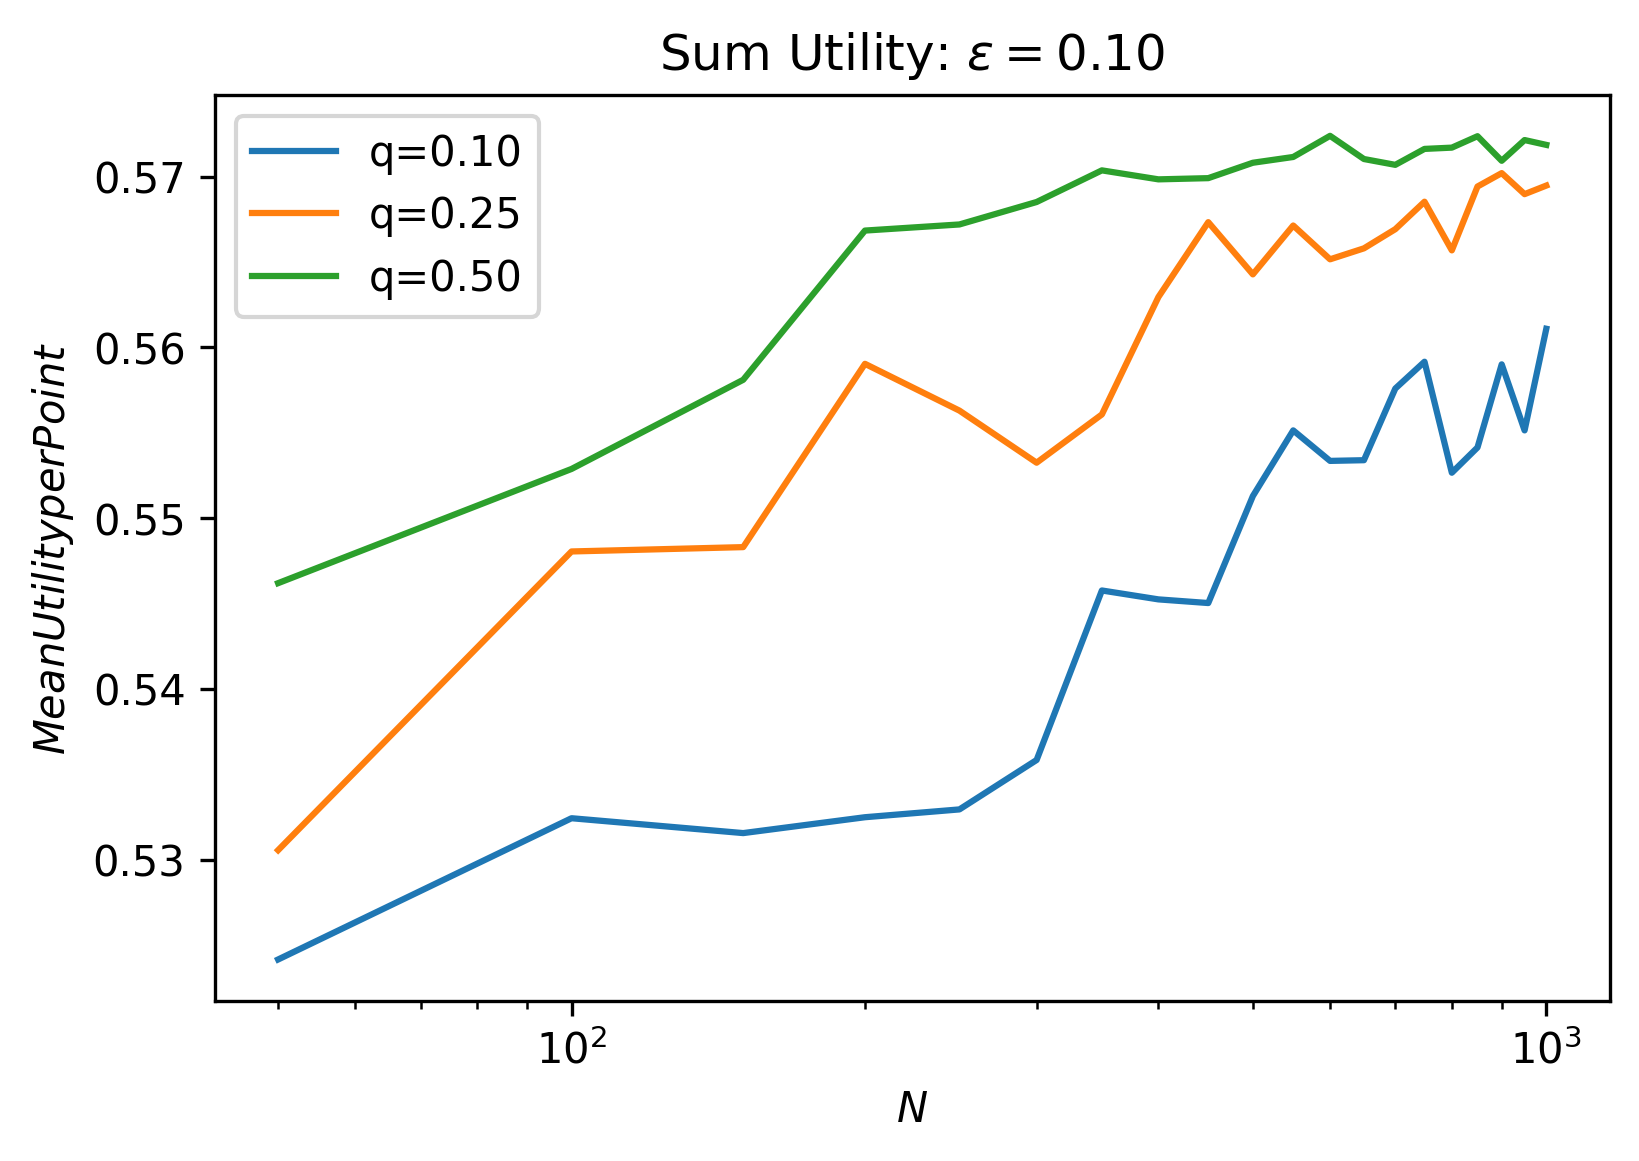

In [103]:
for ind, r in enumerate(results_sum):
    plt.plot(N, np.array(r), label=f"q={q_s[ind]:.2f}")

ax = plt.gca()
ax.set_xscale("log")
plt.xlabel('$N$')
plt.ylabel('$Mean Utility per Point$')
plt.legend()
plt.title(f"Sum Utility: $\epsilon={epsilon:.2f}$")
plt.show()

Given that a utility per point corresponds to a dot product approximately orthogonal, this doesn't seem to be particularly good to me ... Curious that it increases with $N$, likely due ot the way I am scaling the subsets considered. 

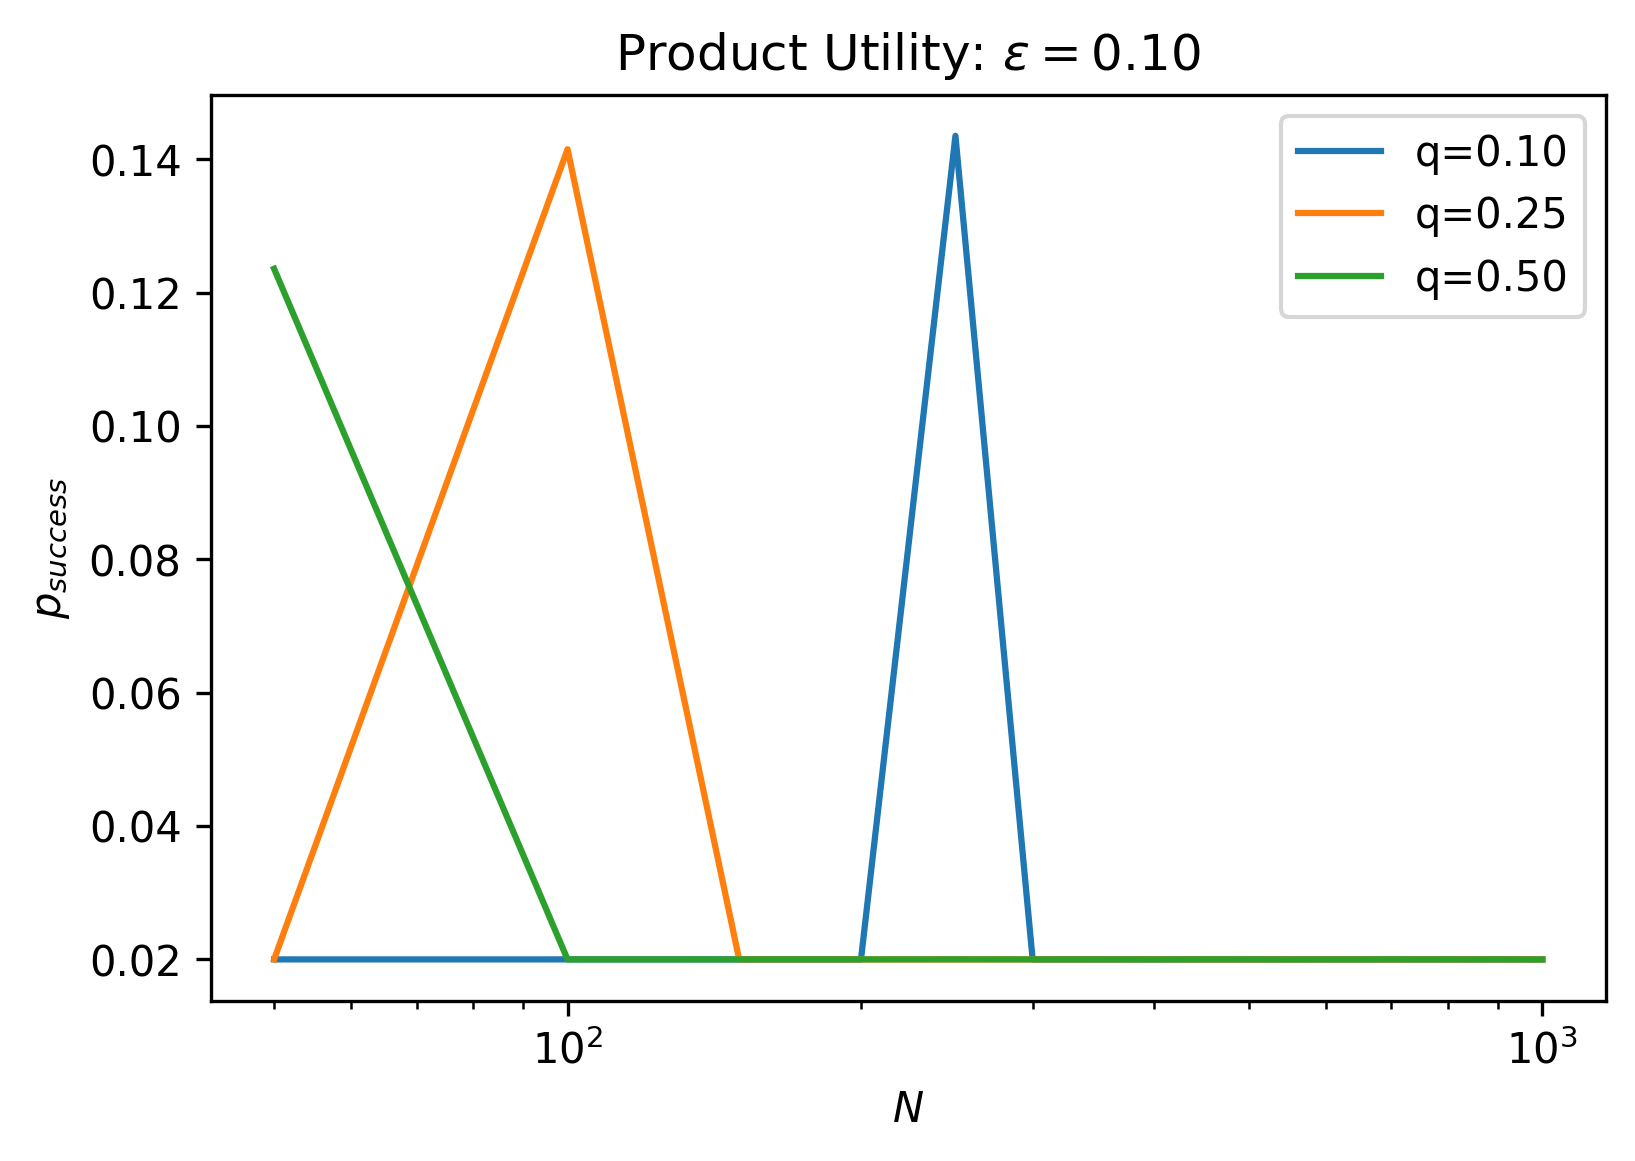

In [104]:
for ind, r in enumerate(results_mul):
    plt.plot(N, np.array(r), label=f"q={q_s[ind]:.2f}")

ax = plt.gca()
ax.set_xscale("log")
plt.xlabel('$N$')
plt.ylabel('$p_{success}$')
plt.legend()
plt.title(f"Product Utility: $\epsilon={epsilon:.2f}$")
plt.show()

This seems to perform really badly, I'm not entirely sure why to be honest.

# Consider more options.

Considering N in [  50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  800.  850.  900.  950. 1000.]
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip


/Users/msharma/.local/share/virtualenvs/DP-PVI-jh1H6qk4/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp
/Users/msharma/.local/share/virtualenvs/DP-PVI-jh1H6qk4/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip
nan elements - skip


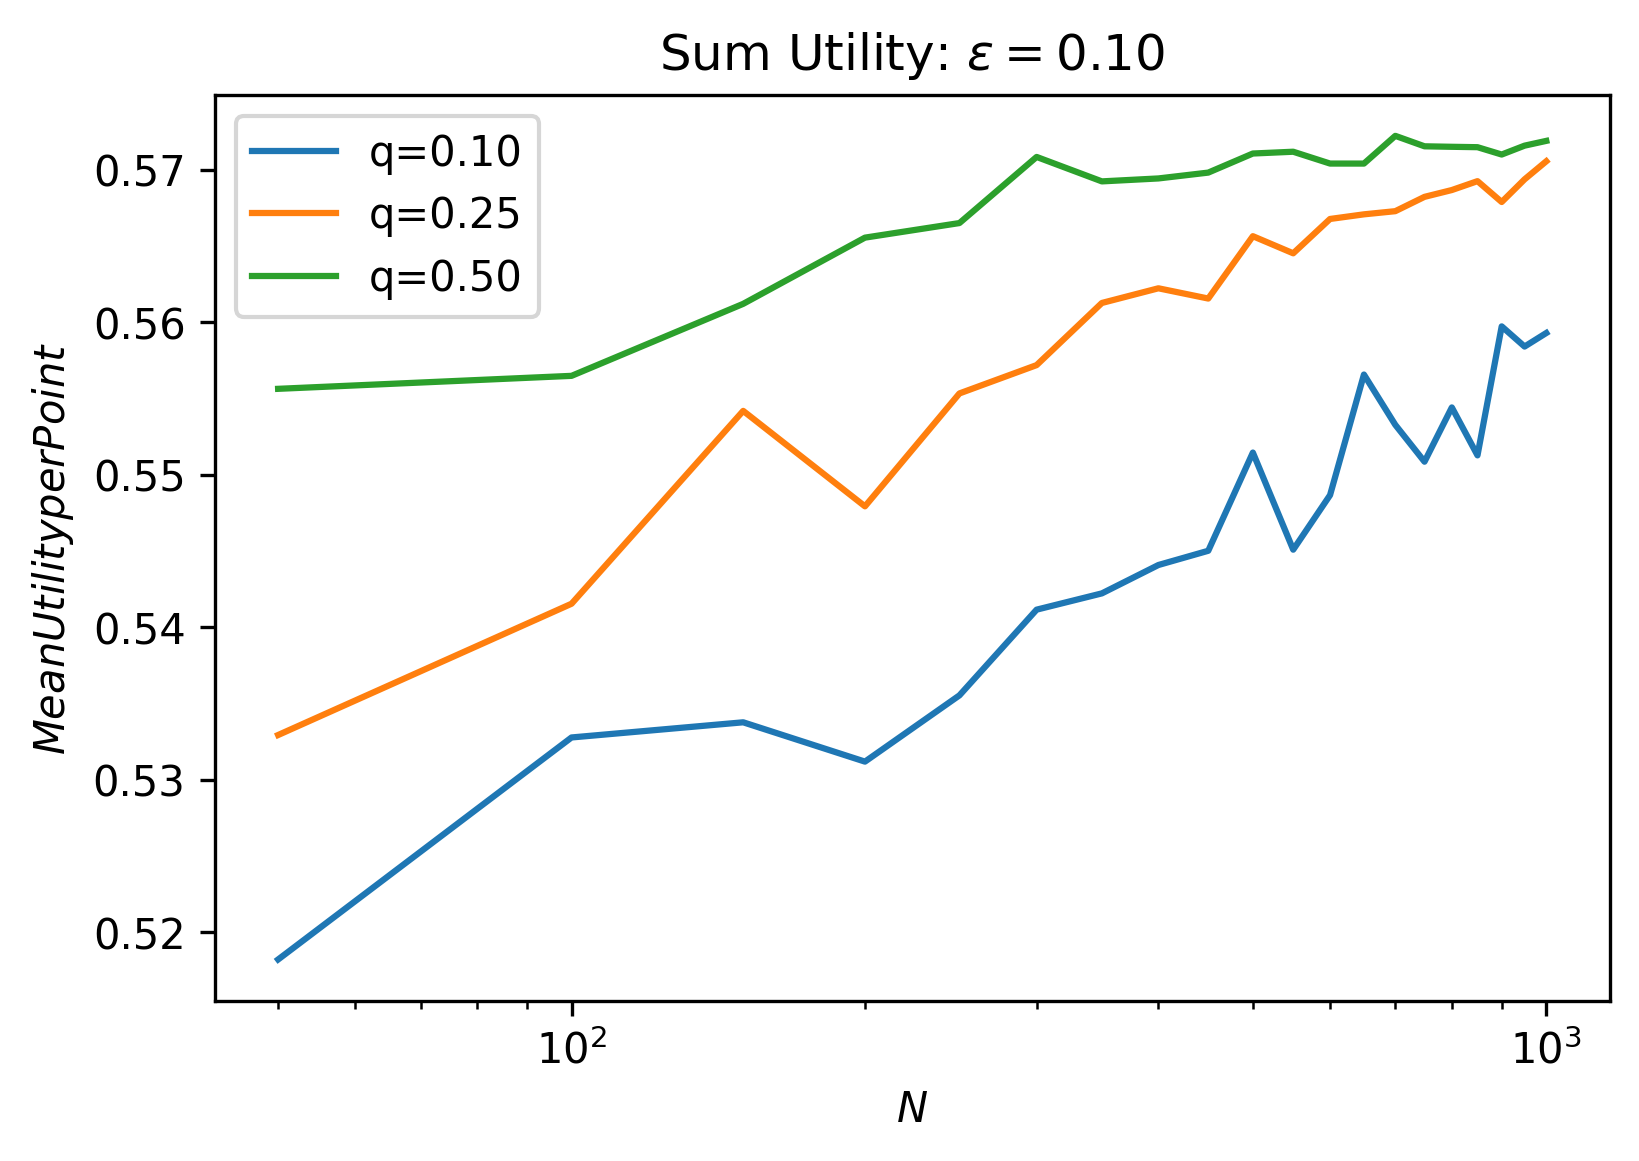

In [105]:
q_s = [0.1, 0.25, 0.5]
N = np.ceil(np.linspace(50, 1000, 20))
print(f"Considering N in {N}")
epsilon = 0.1

# N = [100]
# q_s = [0.1]

results_sum = []
results_mul = []

for q in q_s:
    results_q_sum = []
    results_q_mul = []
    for indx, N_val in enumerate(N):
        prob = sample_test(N_val, int(N_val*q), epsilon, N_consider=400)
        prob_m = sample_test(N_val, int(N_val*q), epsilon, method="multiply", N_consider=400)
        results_q_sum.append(prob)
        results_q_mul.append(prob_m)
    results_sum.append(results_q_sum)
    results_mul.append(results_q_mul)

for ind, r in enumerate(results_sum):
    plt.plot(N, np.array(r), label=f"q={q_s[ind]:.2f}")

ax = plt.gca()
ax.set_xscale("log")
plt.xlabel('$N$')
plt.ylabel('$Mean Utility per Point$')
plt.legend()
plt.title(f"Sum Utility: $\epsilon={epsilon:.2f}$")
plt.show()

Increasing the number of combations considered doesnt really help...